In [5]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
customers = pd.read_csv('/content/drive/MyDrive/DM/Clustering/customer_indicators_dbscan.csv', sep=',', index_col=0)
customers.head()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
0,0.364140,0.147436,0.621610,0.330837,0.373304,0.175731,0
1,0.028548,0.134615,0.579380,0.059851,0.000000,0.002963,1
3,0.040049,1.000000,0.000000,0.255570,0.000000,0.073371,2
4,0.107825,0.099359,0.544568,0.097173,0.621610,0.130666,0
5,0.003902,1.000000,0.000000,0.024902,0.000000,0.070437,2


In [9]:
customers.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.092378,0.515596,0.260383,0.183406,0.282317,0.167236,1.349975
std,0.115191,0.411099,0.319440,0.136662,0.336345,0.131103,1.049314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020743,0.128205,0.000000,0.085845,0.000000,0.071157,0.000000
50%,0.050421,0.326923,0.000000,0.150639,0.000000,0.135807,2.000000
75%,0.116656,1.000000,0.579380,0.248717,0.612602,0.233337,2.000000
max,0.986239,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
del customers["cluster"]

In [11]:
np_customer = customers.to_numpy();

##Parameter exploration

In [12]:
distance_matrices = {
    "euclidean": pdist(np_customer, metric='euclidean'),
    # Squared euclidean
    "sqeuclidean": pdist(np_customer, metric='sqeuclidean'),
    "mahalanobis": pdist(np_customer, metric='mahalanobis'),
    "chebyshev": pdist(np_customer, metric='chebyshev')
}

In [16]:
def run_experiments(metric):
  distance_matrix = distance_matrices[metric]
  return {
      "complete": linkage(distance_matrix, method="complete", metric=metric),
      "single": linkage(distance_matrix, method="single", metric=metric),
      "average": linkage(distance_matrix, method="average", metric=metric),
      "weighted": linkage(distance_matrix, method="weighted", metric=metric),
      "centroid": linkage(distance_matrix, method="centroid", metric=metric),
      "median": linkage(distance_matrix, method="median", metric=metric),
      "ward": linkage(distance_matrix, method="ward", metric=metric)
  }

In [17]:
results = {
    "euclidean": run_experiments("euclidean"),
    # Squared euclidean
    "sqeuclidean": run_experiments("sqeuclidean"),
    "mahalanobis": run_experiments("mahalanobis"),
    "chebyshev": run_experiments("chebyshev")
}

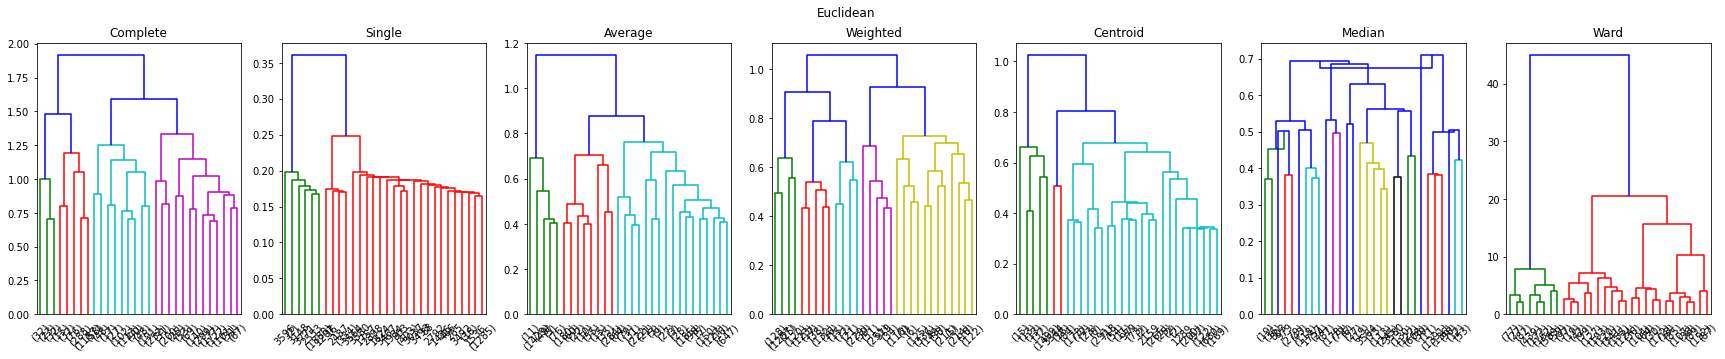

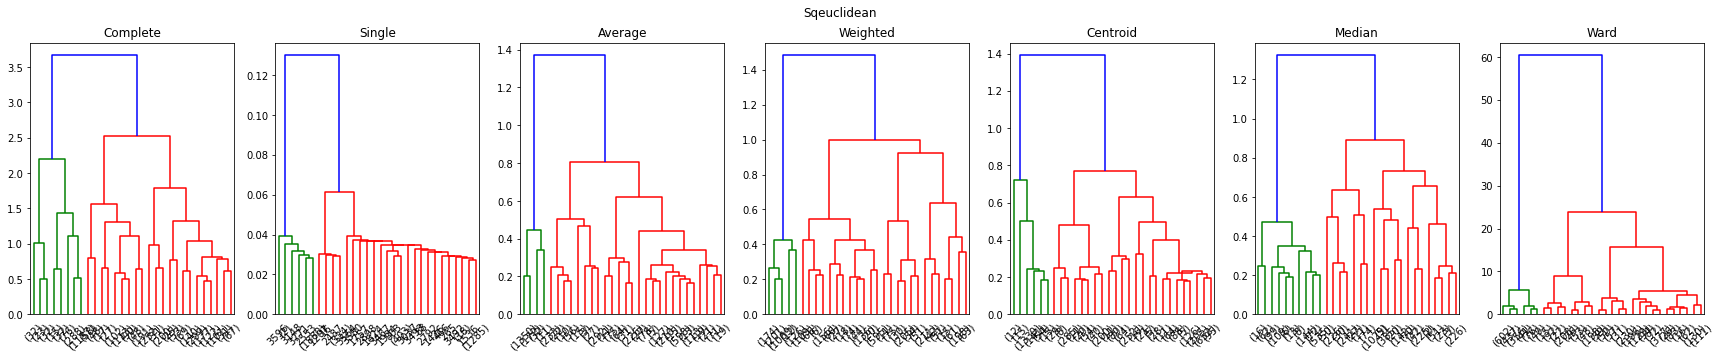

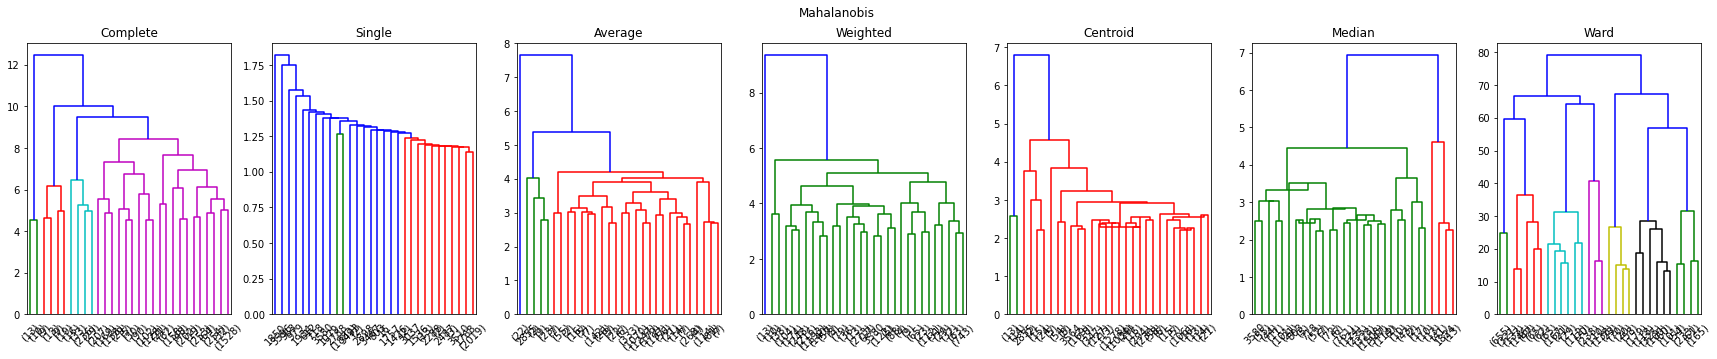

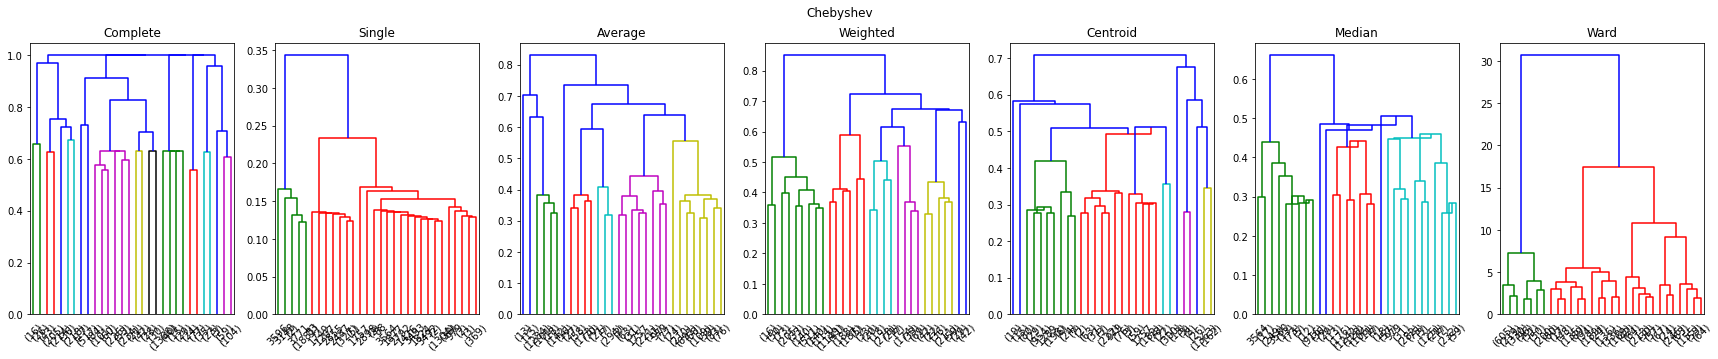

In [18]:
for metric in results:
  fig, axs = plt.subplots(1, 7, figsize = (30, 5))
  plt.suptitle(metric.capitalize())
  for method, ax in zip(results[metric], axs):
    ax.set_title(method.capitalize())
    dendrogram(results[metric][method], truncate_mode='lastp', ax = ax)
  plt.show()

##Choosen parameters

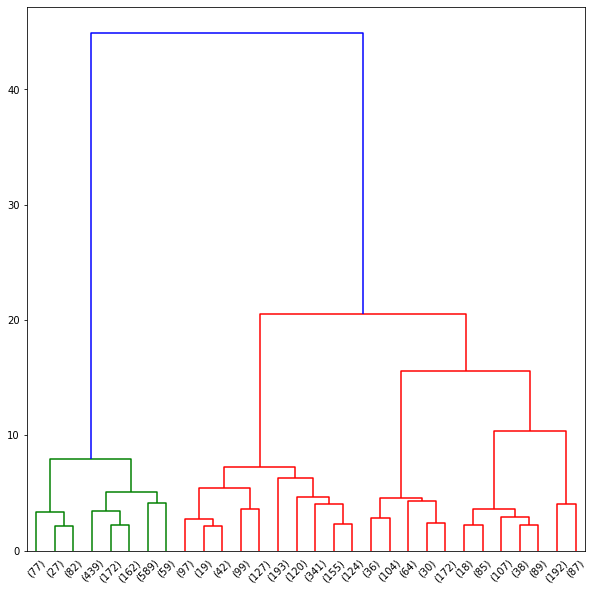

In [19]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
dendrogram(results["euclidean"]["ward"], truncate_mode='lastp', ax = axs)
fig.savefig("/content/drive/MyDrive/DM/Clustering/Hierarchical_Clustering/ward.png")
plt.show()

In [59]:
clusters = fcluster(results["euclidean"]["ward"], t=10, criterion="distance")

In [60]:
tosave = pd.read_csv('/content/drive/MyDrive/DM/Clustering/customer_indicators_dbscan.csv', sep=',', index_col=0)
del tosave["cluster"]
tosave["h_cluster"] = clusters
tosave.to_csv('/content/drive/MyDrive/DM/Clustering/Hierarchical_Clustering/customer_indicators_hclustering.csv', sep=',')

##Data Visualization

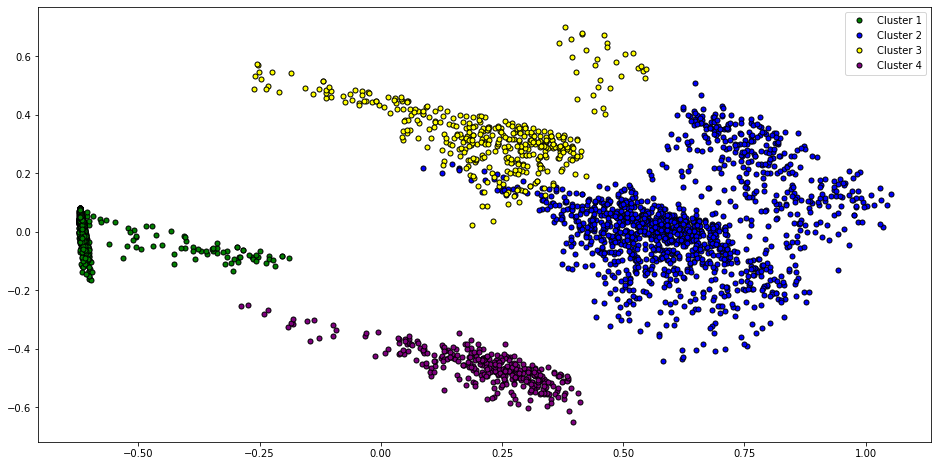

In [61]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(np_customer)

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

for i in range(1, 5):

  class_member_mask = (clusters == i)
  X_core = X_pca[class_member_mask]

  plt.plot(X_core[:, 0], X_core[:, 1], 'o',  markerfacecolor=colors[i], markeredgecolor='k', markersize=5,label='Cluster ' + str(i))
plt.legend()
plt.savefig('/content/drive/MyDrive/DM/Clustering/Hierarchical_Clustering/pca2d.png')

In [62]:
X_pca = PCA(n_components=3).fit_transform(np_customer)
import plotly.express as px

x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

fig = px.scatter_3d(X_pca, x=x, y=y, z=z, color=clusters)
fig.update_traces(marker=dict(size=4))
fig.show()

## Cluster Analysis

In [63]:
customers_c = tosave.copy()

In [64]:
customers_c.head()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
0,0.364140,0.147436,0.621610,0.330837,0.373304,0.175731,2
1,0.028548,0.134615,0.579380,0.059851,0.000000,0.002963,4
3,0.040049,1.000000,0.000000,0.255570,0.000000,0.073371,1
4,0.107825,0.099359,0.544568,0.097173,0.621610,0.130666,2
5,0.003902,1.000000,0.000000,0.024902,0.000000,0.070437,1


In [65]:
customers_c.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.092378,0.515596,0.260383,0.183406,0.282317,0.167236,2.078561
std,0.115191,0.411099,0.319440,0.136662,0.336345,0.131103,1.217495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.020743,0.128205,0.000000,0.085845,0.000000,0.071157,1.000000
50%,0.050421,0.326923,0.000000,0.150639,0.000000,0.135807,2.000000
75%,0.116656,1.000000,0.579380,0.248717,0.612602,0.233337,3.000000
max,0.986239,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [66]:
customers_1 = customers_c[customers_c["h_cluster"] == 1]
customers_2 = customers_c[customers_c["h_cluster"] == 2]
customers_3 = customers_c[customers_c["h_cluster"] == 3]
customers_4 = customers_c[customers_c["h_cluster"] == 4]
customers_5 = customers_c[customers_c["h_cluster"] == 5]

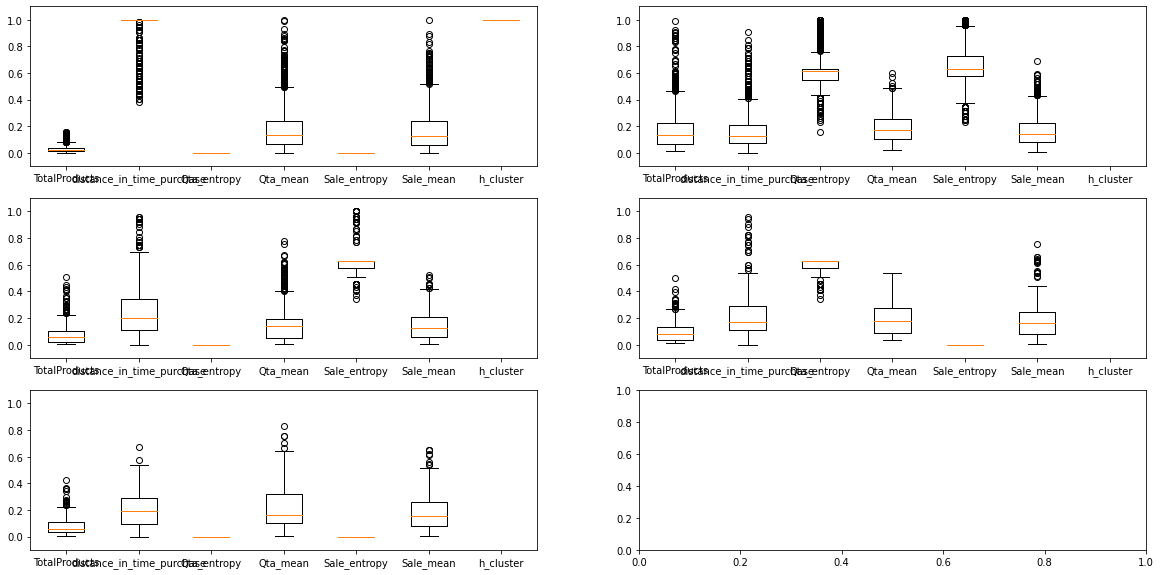

In [67]:
fig, ax = plt.subplots(3,2,figsize=(20, 10))

label_names = customers_1.columns

ax[0][0].boxplot(customers_1.to_numpy())
ax[0][0].set_ylim(-0.1,1.1)
ax[0][0].set_xticklabels(label_names)

ax[0][1].boxplot(customers_2.to_numpy())
ax[0][1].set_ylim(-0.1,1.1)
ax[0][1].set_xticklabels(label_names)

ax[1][0].boxplot(customers_3.to_numpy())
ax[1][0].set_ylim(-0.1,1.1)
ax[1][0].set_xticklabels(label_names)

ax[1][1].boxplot(customers_4.to_numpy())
ax[1][1].set_ylim(-0.1,1.1)
ax[1][1].set_xticklabels(label_names)

ax[2][0].boxplot(customers_5.to_numpy())
ax[2][0].set_ylim(-0.1,1.1)
ax[2][0].set_xticklabels(label_names)
print()
plt.savefig('/content/drive/MyDrive/DM/Clustering/Hierarchical_Clustering/hc-box-plots.png')

## Further analysis

In [103]:
clusters = fcluster(results["euclidean"]["ward"], t=7, criterion="distance")

In [117]:
print(np.unique(clusters))

[1 2 3 4 5 6 7]


In [118]:
customers_c = tosave.copy()

In [119]:
customers_c["h_cluster"] = clusters

In [120]:
customers_1 = customers_c[customers_c["h_cluster"] == 1]
customers_2 = customers_c[customers_c["h_cluster"] == 2]
customers_3 = customers_c[customers_c["h_cluster"] == 3]
customers_4 = customers_c[customers_c["h_cluster"] == 4]
customers_5 = customers_c[customers_c["h_cluster"] == 5]
customers_6 = customers_c[customers_c["h_cluster"] == 6]
customers_7 = customers_c[customers_c["h_cluster"] == 7]

In [121]:
customers_1.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
count,186.000000,186.000000,186.0,186.000000,186.0,186.000000,186.0
mean,0.077033,0.998139,0.0,0.486397,0.0,0.394896,1.0
std,0.028481,0.019604,0.0,0.174872,0.0,0.193302,0.0
min,0.014377,0.750000,0.0,0.091743,0.0,0.041717,1.0
25%,0.059971,1.000000,0.0,0.382700,0.0,0.240040,1.0
50%,0.071986,1.000000,0.0,0.456750,0.0,0.378839,1.0
75%,0.092165,1.000000,0.0,0.576343,0.0,0.535651,1.0
max,0.159992,1.000000,0.0,1.000000,0.0,1.000000,1.0


In [122]:
customers_2.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
count,1421.000000,1421.000000,1421.0,1421.000000,1421.0,1421.000000,1421.0
mean,0.022273,0.982975,0.0,0.136298,0.0,0.138193,2.0
std,0.015857,0.082812,0.0,0.096027,0.0,0.110454,0.0
min,0.000000,0.384615,0.0,0.000000,0.0,0.000000,2.0
25%,0.009858,1.000000,0.0,0.061599,0.0,0.048435,2.0
50%,0.018484,1.000000,0.0,0.116645,0.0,0.109162,2.0
75%,0.032656,1.000000,0.0,0.195282,0.0,0.203157,2.0
max,0.072499,1.000000,0.0,0.452163,0.0,0.488163,2.0


In [123]:
customers_3.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.0
mean,0.311900,0.104433,0.786106,0.221294,0.662397,0.169059,3.0
std,0.182274,0.072936,0.169251,0.079040,0.188878,0.092409,0.0
min,0.067776,0.009014,0.246847,0.074377,0.246847,0.015446,3.0
25%,0.178322,0.057692,0.625653,0.156525,0.544568,0.103055,3.0
50%,0.276751,0.086004,0.819448,0.213822,0.623833,0.149155,3.0
75%,0.401931,0.134615,0.943189,0.269547,0.819448,0.222350,3.0
max,0.986239,0.461538,1.000000,0.484179,1.000000,0.586130,3.0


In [124]:
customers_4.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,h_cluster
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0
mean,0.116684,0.183813,0.563870,0.173737,0.650323,0.160667,4.0
std,0.082515,0.141393,0.079662,0.104337,0.155582,0.112182,0.0
min,0.013966,0.000000,0.152869,0.021719,0.234222,0.008525,4.0
25%,0.053194,0.088462,0.511860,0.089777,0.579380,0.077820,4.0
50%,0.095091,0.153846,0.579380,0.138270,0.630930,0.132279,4.0
75%,0.158349,0.230769,0.630930,0.246833,0.630930,0.219669,4.0
max,0.560074,0.903846,0.789690,0.598515,1.000000,0.687222,4.0


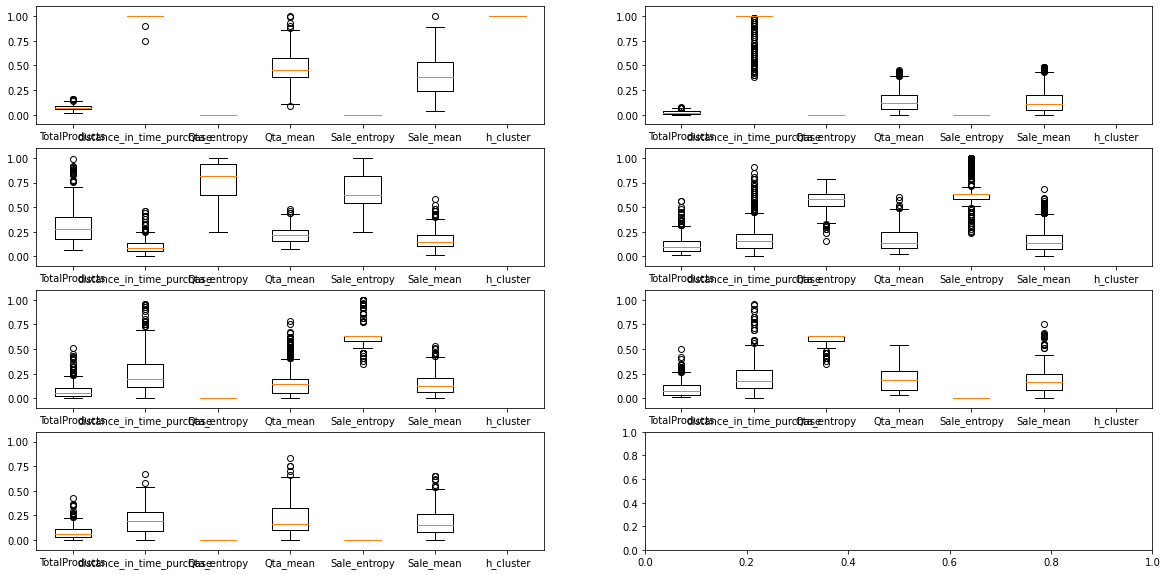

In [115]:
fig, ax = plt.subplots(4,2,figsize=(20, 10))

label_names = customers_1.columns

ax[0][0].boxplot(customers_1.to_numpy())
ax[0][0].set_ylim(-0.1,1.1)
ax[0][0].set_xticklabels(label_names)

ax[0][1].boxplot(customers_2.to_numpy())
ax[0][1].set_ylim(-0.1,1.1)
ax[0][1].set_xticklabels(label_names)

ax[1][0].boxplot(customers_3.to_numpy())
ax[1][0].set_ylim(-0.1,1.1)
ax[1][0].set_xticklabels(label_names)

ax[1][1].boxplot(customers_4.to_numpy())
ax[1][1].set_ylim(-0.1,1.1)
ax[1][1].set_xticklabels(label_names)

ax[2][0].boxplot(customers_5.to_numpy())
ax[2][0].set_ylim(-0.1,1.1)
ax[2][0].set_xticklabels(label_names)

ax[2][1].boxplot(customers_6.to_numpy())
ax[2][1].set_ylim(-0.1,1.1)
ax[2][1].set_xticklabels(label_names)

ax[3][0].boxplot(customers_7.to_numpy())
ax[3][0].set_ylim(-0.1,1.1)
ax[3][0].set_xticklabels(label_names)
print()

In [94]:
X_pca = PCA(n_components=3).fit_transform(np_customer)
import plotly.express as px

x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

fig = px.scatter_3d(X_pca, x=x, y=y, z=z, color=clusters)
fig.update_traces(marker=dict(size=4))
fig.show()